In [45]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
from beautifultable import BeautifulTable
import time
import datetime
import scipy.stats

# for train and test data set split
from sklearn.model_selection import train_test_split

# for grid search
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import RandomizedSearchCV

# for evaluation metric
# accuracy
from sklearn.metrics import accuracy_score
# Report
from sklearn.metrics import classification_report
# AUC
from sklearn.metrics import roc_curve, auc
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
from pylab import rcParams

# for model comparision
from sklearn import metrics
# for decision tree model
from sklearn import tree

# for decision tree visualizaiton
from six import StringIO
from IPython.display import Image
from sklearn.tree import export_graphviz
import pydotplus

# for gradient boosting
from sklearn.ensemble import GradientBoostingClassifier

# for random search
from sklearn.ensemble import RandomForestClassifier
from pandas_profiling import ProfileReport

In [6]:
bids = pd.read_csv("bids_gc.csv")
train = pd.read_csv("train_gc.csv")

In [7]:
bids.head()

,bid_id,bidder_id,auction,merchandise,device,time,country,ip,url
0,0,8dac2b259fd1c6d1120e519fb1ac14fbqvax8,ewmzr,jewelry,phone0,9759243157894736,us,69.166.231.58,vasstdc27m7nks3
1,1,668d393e858e8126275433046bbd35c6tywop,aeqok,furniture,phone1,9759243157894736,in,50.201.125.84,jmqlhflrzwuay9c
2,2,aa5f360084278b35d746fa6af3a7a1a5ra3xe,wa00e,home goods,phone2,9759243157894736,py,112.54.208.157,vasstdc27m7nks3
3,3,3939ac3ef7d472a59a9c5f893dd3e39fh9ofi,jefix,jewelry,phone4,9759243157894736,in,18.99.175.133,vasstdc27m7nks3
4,4,8393c48eaf4b8fa96886edc7cf27b372dsibi,jefix,jewelry,phone5,9759243157894736,in,145.138.5.37,vasstdc27m7nks3


In [121]:
bids.isnull().sum()

bid_id            0
bidder_id         0
auction           0
merchandise       0
device            0
time              0
country        8859
ip                0
url               0
dtype: int64

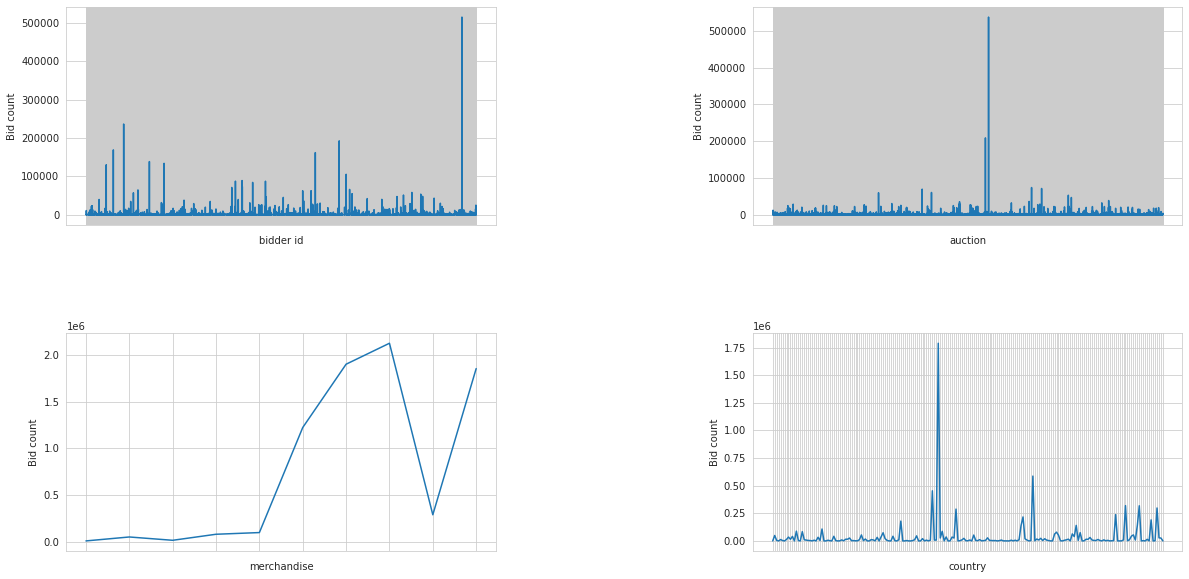

In [120]:
# Analyzing bids.csv
group_df = []
group_df.append(pd.DataFrame(bids.groupby(['bidder_id']).size().reset_index(name="bid_count")).dropna())
group_df.append(pd.DataFrame(bids.groupby(['auction']).size().reset_index(name="bid_count")).dropna())
group_df.append(pd.DataFrame(bids.groupby(['merchandise']).size().reset_index(name="bid_count")).dropna())
group_df.append(pd.DataFrame(bids.groupby(['country']).size().reset_index(name="bid_count")).dropna())
names = ['bidder id', 'auction', 'merchandise', 'country']
fig = plt.figure(figsize=(20, 10))
fig.subplots_adjust(hspace=0.5, wspace=0.6)
for i in range(4):
    ax = fig.add_subplot(2, 2, i+1)
    ax.plot(group_df[i].iloc[:,0], group_df[i].bid_count)
    ax.set_ylabel('Bid count')
    ax.set_xlabel(names[i])
    ax.set_xticklabels([])

# plt.xlabel('#Bid Count By Bidder ID',fontsize = 20)
# plt.ylabel('Bid Count',fontsize=20)
# plt.xticks(fontsize=14)
# plt.yticks(fontsize=14)
# # plt.legend(('HUMAN','BOT'), loc='upper right',fontsize=15)
plt.savefig('bid_count_by_bidder') 

/data/samaurya/anaconda/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
/data/samaurya/anaconda/lib/python3.8/site-packages/seaborn/_core.py:1319: UserWarning: Vertical orientation ignored with only `x` specified.
  warnings.warn(single_var_warning.format("Vertical", "x"))
/data/samaurya/anaconda/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
/data/samaurya/anaconda/lib/python3.8/site-packages/seaborn/_core.py:1319: UserWarning: Vertical orientation ignored with only `x` spe

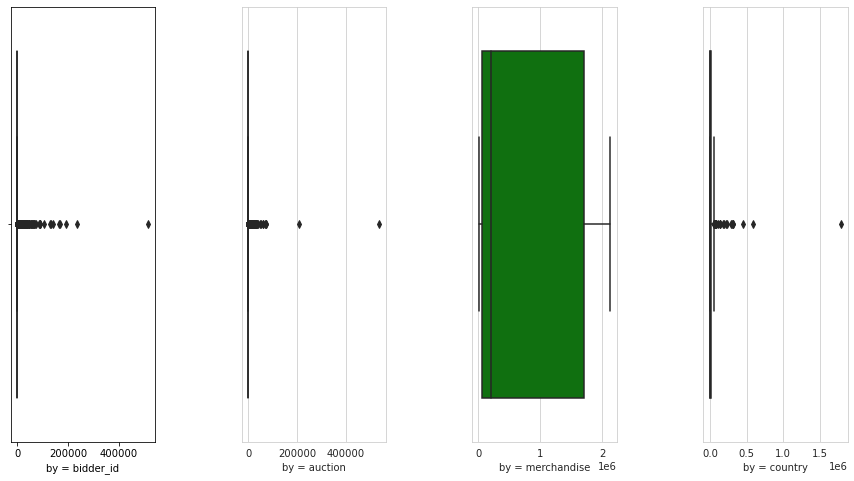

In [60]:
# group_df = []
# group_df.append(pd.DataFrame(bids.groupby(['bidder_id']).size().reset_index(name = "bid_count")).dropna())
# group_df.append(pd.DataFrame(bids.groupby(['auction']).size().reset_index(name = "bid_count")).dropna())
# group_df.append(pd.DataFrame(bids.groupby(['merchandise']).size().reset_index(name = "bid_count")).dropna())
# group_df.append(pd.DataFrame(bids.groupby(['country']).size().reset_index(name = "bid_count")).dropna())
# names = ['by = bidder_id', 'by = auction', 'by = merchandise', 'by = country']
# fig = plt.figure(figsize=(15, 8))
# fig.subplots_adjust(hspace=0.5, wspace=0.6)
# for i in range(4):
#     ax = fig.add_subplot(1, 4, i+1)
#     sns.set_style('whitegrid')
#     sns.boxplot(group_df[i].iloc[:,1] ,color='green',orient='v')#, notch=False, vert=False, whis=0.2)
#     ax.set_xlabel(names[i])
    
# plt.savefig('distribution')

In [8]:
train.head()

,bidder_id,payment_account,address,outcome
0,91a3c57b13234af24875c56fb7e2b2f4rb56a,a3d2de7675556553a5f08e4c88d2c228754av,a3d2de7675556553a5f08e4c88d2c228vt0u4,0.0
1,624f258b49e77713fc34034560f93fb3hu3jo,a3d2de7675556553a5f08e4c88d2c228v1sga,ae87054e5a97a8f840a3991d12611fdcrfbq3,0.0
2,1c5f4fc669099bfbfac515cd26997bd12ruaj,a3d2de7675556553a5f08e4c88d2c2280cybl,92520288b50f03907041887884ba49c0cl0pd,0.0
3,4bee9aba2abda51bf43d639013d6efe12iycd,51d80e233f7b6a7dfdee484a3c120f3b2ita8,4cb9717c8ad7e88a9a284989dd79b98dbevyi,0.0
4,4ab12bc61c82ddd9c2d65e60555808acqgos1,a3d2de7675556553a5f08e4c88d2c22857ddh,2a96c3ce94b3be921e0296097b88b56a7x1ji,0.0


The datasets are provided in two parts:

train.csv: the base bidder dataset with labels. Besides label, it also contains unique bidder_id followed with payment_account, address and outcome;

bids.csv: the dataset contains some more useful information associated with unique key bid_id, corresponding with bidder_id, auction, merchandise, device, time, country, ip, and url. time and url are encrypted information.

Since both of these two files contains the unique key bidder_id, we firstly joined these data by this key. Our object is to try to find each bid is made by a human or robot, thus, we only consider the data which have bids information and labelled. We will left join on train.csv and check the joined data for missing bids information.

In [136]:
# join the training data set with full data set
data = pd.merge(bids, train, on ='bidder_id', how='left')
#data.to_csv("data.csv")

In [20]:
data.head()

,bidder_id,payment_account,address,outcome,bid_id,auction,merchandise,device,time,country,ip,url
0,91a3c57b13234af24875c56fb7e2b2f4rb56a,a3d2de7675556553a5f08e4c88d2c228754av,a3d2de7675556553a5f08e4c88d2c228vt0u4,0.0,85371.0,yitr4,home goods,phone35,9.759489e+15,ke,82.34.177.248,vasstdc27m7nks3
1,91a3c57b13234af24875c56fb7e2b2f4rb56a,a3d2de7675556553a5f08e4c88d2c228754av,a3d2de7675556553a5f08e4c88d2c228vt0u4,0.0,274487.0,btpyy,home goods,phone1004,9.760249e+15,zm,202.130.71.167,vasstdc27m7nks3
2,91a3c57b13234af24875c56fb7e2b2f4rb56a,a3d2de7675556553a5f08e4c88d2c228754av,a3d2de7675556553a5f08e4c88d2c228vt0u4,0.0,527436.0,kj2ko,home goods,phone4,9.762261e+15,ke,22.54.76.225,vasstdc27m7nks3
3,91a3c57b13234af24875c56fb7e2b2f4rb56a,a3d2de7675556553a5f08e4c88d2c228754av,a3d2de7675556553a5f08e4c88d2c228vt0u4,0.0,554135.0,1m5t8,home goods,phone4,9.762431e+15,ke,32.13.237.126,vasstdc27m7nks3
4,91a3c57b13234af24875c56fb7e2b2f4rb56a,a3d2de7675556553a5f08e4c88d2c228754av,a3d2de7675556553a5f08e4c88d2c228vt0u4,0.0,607628.0,btpyy,home goods,phone4,9.762789e+15,ke,202.236.188.240,vasstdc27m7nks3


### Check for null values

In [137]:
data.isnull().sum()

bid_id                   0
bidder_id                0
auction                  0
merchandise              0
device                   0
time                     0
country                  0
ip                       0
url                      0
payment_account    4585110
address            4585110
outcome            4585110
dtype: int64

Since we can see all the missing values are from the variables that come from bids, these are the bidders in train.csv that did not have any entry in bids.csv (The extra in left outer join). These are the bidders who have no bids.

In [135]:
nobids_train = data[pd.isnull(data['bid_id'])]['bidder_id'].unique()
len(nobids_train)

0

In [129]:
data[data['bidder_id'].isin(nobids_train)]['outcome']

17583      0.0
42424      0.0
129439     0.0
214915     0.0
221776     0.0
226432     0.0
255107     0.0
305088     0.0
333331     0.0
409451     0.0
654549     0.0
657208     0.0
788183     0.0
790914     0.0
794927     0.0
810369     0.0
883351     0.0
1018748    0.0
1019599    0.0
1021349    0.0
1123023    0.0
1139921    0.0
1217466    0.0
1465813    0.0
1482542    0.0
1648201    0.0
1974826    0.0
2139077    0.0
2999380    0.0
Name: outcome, dtype: float64

In [130]:
data = data[~data['bidder_id'].isin(nobids_train)]

There exist 29 bidders in training data set having no bid data. After checking with their labels, they were all marked as human. Since we aim to detect robots, we will just ignore them.

In [131]:
# Handling missing countries : Imputing using mode (Categorical value)
data['country'] = data['country'].fillna(data['country'].dropna().mode().values[0])

In [132]:
prof = ProfileReport(data, minimal = True)
prof.to_file(output_file='profile_gc2.html')

Summarize dataset:   0%|          | 0/5 [00:00<?, ?it/s]

Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]

Export report to file:   0%|          | 0/1 [00:00<?, ?it/s]

In [133]:
prof

In [86]:
data['outcome'].value_counts()

0.0    2658808
1.0     412416
Name: outcome, dtype: int64

[Text(0.5, 1.0, 'Number of bids placed')]

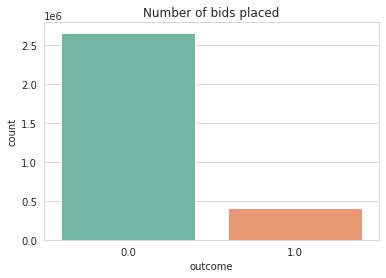

In [140]:
sns.countplot(x ='outcome', data = data, palette = "Set2").set(title='Number of bids placed')

The training data set has unbalanced number of bids made by robots and humans

In [93]:
# check the unique number of each feature
print(f"total row in bid:          {len(data)}")
print(f"total bids in bid:         {len(data['bid_id'].unique())}")
print(f"total bidder in bids:      {len(data['bidder_id'].unique())}")
print(f"total payment in bids:     {len(data['payment_account'].unique())}")
print(f"total address in bids:     {len(data['address'].unique())}")
print(f"total auction in bids:     {len(data['auction'].unique())}")
print(f"total merchandise in bids: {len(data['merchandise'].unique())}")
print(f"total device in bids:      {len(data['device'].unique())}")
print(f"total country in bids:     {len(data['country'].unique())}")
print(f"total ip in bids:          {len(data['ip'].unique())}")
print(f"total url in bids:         {len(data['url'].unique())}")

total row in bid:          3071224
total bids in bid:         3071224
total bidder in bids:      1984
total payment in bids:     1984
total address in bids:     1984
total auction in bids:     12740
total merchandise in bids: 10
total device in bids:      5729
total country in bids:     198
total ip in bids:          1030950
total url in bids:         663873


In [57]:
print(f"average bids per robot: %.0f" % float(len(
    data[data['outcome'] == 1])/len(data[data['outcome'] == 1]['bidder_id'].unique())))
print(f"average bids per human:  %.0f" % float(len(
    data[data['outcome'] == 0])/len(data[data['outcome'] == 0]['bidder_id'].unique())))
print(f"average bids per auction by robot: %.0f" % float(
    len(data[data['outcome'] == 1])/len(data[data['outcome'] == 1]['auction'].unique())))
print(f"average bids per auction by human:  %.0f" % float(
    len(data[data['outcome'] == 0])/len(data[data['outcome'] == 0]['auction'].unique())))
print(f"average bids per device by robot: %.0f" % float(
    len(data[data['outcome'] == 1])/len(data[data['outcome'] == 1]['device'].unique())))
print(f"average bids per device by human:  %.0f" % float(
    len(data[data['outcome'] == 0])/len(data[data['outcome'] == 0]['device'].unique())))
print(f"average bids per ip by robots: %.2f" % float(
    len(data[data['outcome'] == 1])/len(data[data['outcome'] == 1]['ip'].unique())))
print(f"average bids per ip by human:  %.2f" % float(
    len(data[data['outcome'] == 0])/len(data[data['outcome'] == 0]['ip'].unique())))
print(f"average bids per url by robot: %.2f" % float(
    len(data[data['outcome'] == 1])/len(data[data['outcome'] == 1]['url'].unique())))
print(f"average bids per url by human:  %.2f" % float(
    len(data[data['outcome'] == 0])/len(data[data['outcome'] == 0]['url'].unique())))

average bids per robot: 4004
average bids per human:  1414
average bids per auction by robot: 65
average bids per auction by human:  217
average bids per device by robot: 134
average bids per device by human:  516
average bids per ip by robots: 1.79
average bids per ip by human:  3.18
average bids per url by robot: 7.52
average bids per url by human:  4.36
